# Storm Events Exploratory Analysis 

This notebook contains an exploratory analysis of the data from the NCDC storm events database. The database contains information about the storms that have occured since 1950 and their effects, such as property damage, crop damage, injuries, and fatalities.  

**Data source:** *National Centers for Environmental Information/NOAA*. NCDC Storm Events Database. https://www.ncdc.noaa.gov/stormevents/ftp.jsp


### Questions being explored: 
1. Storm Type 
    * Which types of storms occur the most often?
    * How does the number of storms vary by year? Are there any trends in the number of storm occurances?
2. Location
    * Where in the country do the majority of storms occur?
3. Time 
    * Are storms more likely to occur during certain months or times of day? 
4. Damage
    * How much damage (property and crops) is caused by storms each year? 
    * Which types of storms cause the most damage?
5. Injuries and Fatalities
    * Which types of storms cause the most injuries and fatalities? 
    * Which age or sex is most likely to die from storms?
    * Which locations are the most dangerous in a certain type of storm?

### Potential problems with the data
1. Not all storm events were recorded, particularly in earlier years. The 1950s files are very short, and before 1994, only tornadoes, thunderstorms, and hail were recorded. When this could skew the data, only more recent years were used. 
2. Missing values in many of the columns, like crop and property damage. Missing values were ignored, rather than estimated, in calculations. This may cause inaccurate values. 
3. Some storm events may be counted twice if a storm moves into a new region or if an event lasts more than 1 month. This is rare enough that these events were not excluded from the data. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from numpy import linspace
%matplotlib inline

details = pd.read_csv('details.csv', low_memory=False)


1.0

## Storm Type

In [2]:
details.EVENT_TYPE.unique()

array(['Tornado', 'Hail', 'Thunderstorm Wind',
       'TORNADOES, TSTM WIND, HAIL', 'THUNDERSTORM WINDS/FLOODING',
       'HAIL/ICY ROADS', 'HAIL FLOODING',
       'THUNDERSTORM WINDS/FLASH FLOOD', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WIND/ TREES', 'THUNDERSTORM WIND/ TREE',
       'THUNDERSTORM WINDS FUNNEL CLOU', 'TORNADO/WATERSPOUT',
       'THUNDERSTORM WINDS/HEAVY RAIN', 'THUNDERSTORM WINDS HEAVY RAIN',
       'THUNDERSTORM WINDS/ FLOOD', 'High Wind', 'Flash Flood',
       'Winter Storm', 'Blizzard', 'Cold/Wind Chill', 'Heavy Snow',
       'Flood', 'Ice Storm', 'Dense Fog', 'Winter Weather', 'Avalanche',
       'Frost/Freeze', 'Lightning', 'Heat', 'Heavy Rain', 'Funnel Cloud',
       'Coastal Flood', 'Strong Wind', 'Wildfire', 'Waterspout',
       'High Surf', 'Dust Storm', 'Drought', 'Rip Current', 'Dust Devil',
       'Tropical Storm', 'Debris Flow', 'Hurricane (Typhoon)',
       'Freezing Fog', 'Storm Surge/Tide', 'Marine High Wind', 'Sleet',
       'Lake-Effect

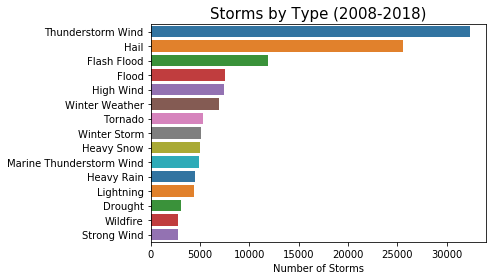

In [3]:
last_10_years = details[details.YEAR >= 2008]
top_types = last_10_years.groupby('EVENT_TYPE').EPISODE_ID.nunique().sort_values(ascending=False).head(15)

ax = plt.axes()
sns.barplot(y=top_types.index, x=top_types.values, palette="tab10")
ax.set_title("Storms by Type (2008-2018)", fontsize=15);
ax.set_xlabel("Number of Storms");
ax.set_ylabel("");



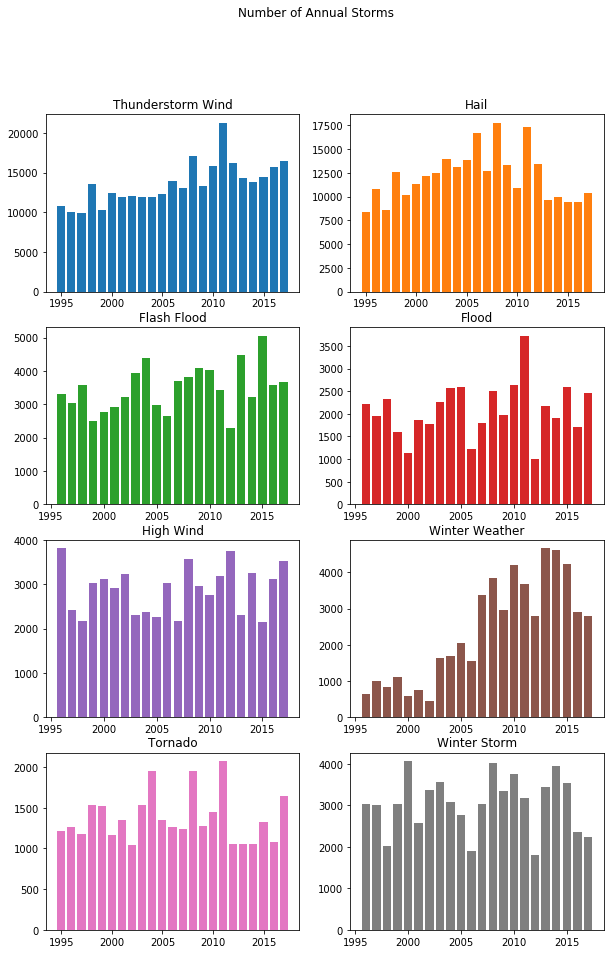

In [4]:
details_9517 = details[(details.YEAR >= 1995) & (details.YEAR <= 2017)]
cmp = plt.get_cmap("tab10")
ax, fig=plt.subplots(figsize=(10, 15))
for num in range(0, 8):
    annual_count = details_9517[details_9517.EVENT_TYPE==top_types.index[num]].groupby('YEAR').EVENT_ID.count()
    ax1 = plt.subplot(4, 2, num+1)
    plt.bar(annual_count.index, annual_count.values, color=cmp(num)); ax1.set_title(top_types.index[num])
plt.suptitle('Number of Annual Storms');

The most common storms are thunderstorm wind, hail, flash flood, flood, and high wind. The annual count of storms for each storm type shows that there is no trend for most storm types. There might be a periodic trend for floods and winter storms. The winter weather trend is most likely caused by classification of storms rather than a natural phenomenon. 

## Location

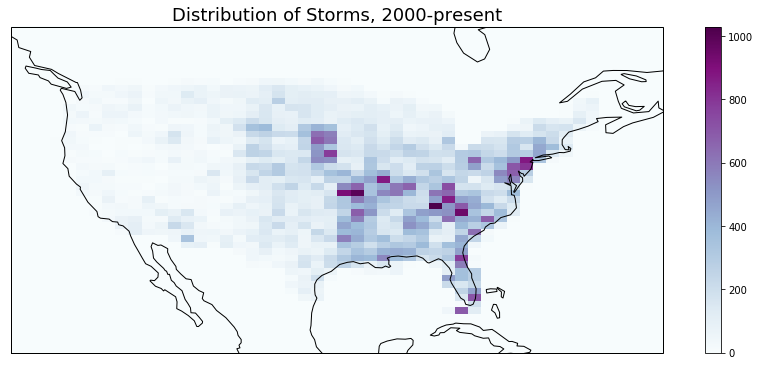

In [5]:
locations = pd.read_csv('locations.csv')
locations.dropna(axis=0, inplace=True)
locations = locations.set_index('EVENT_ID').join(details[['EVENT_ID', 'YEAR', 'EVENT_TYPE']].set_index('EVENT_ID'))
episode_locations = locations.groupby('EPISODE_ID').mean() 
# if there are multiple events for an episode, only one location will be used  

lat = episode_locations.LATITUDE[episode_locations.YEAR > 1999]
lon = episode_locations.LONGITUDE[episode_locations.YEAR > 1999]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax = plt.hist2d(lon, lat, bins=(50, 50), range= [[-130, -60], [20, 55]], cmap=plt.cm.BuPu);
plt.colorbar()
fig = plt.gcf(); fig.set_size_inches([15, 6]); 
ax1 = fig.gca(); ax1.set_title("Distribution of Storms, 2000-present", fontsize=18);


The majority of storms occur on the eastern side of the country. This is not that surprising; thunderstorms, hail, tornadoes, etc. can develop more easily on the plains. However, it might imply that storms are more likely to be recorded in more populated areas.

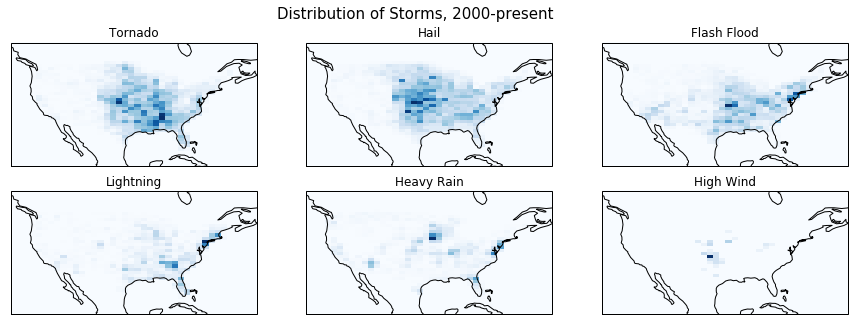

In [6]:
def PlotLocation(StormType, ax):
    lat = locations.LATITUDE[(locations.YEAR > 1999) & (locations.EVENT_TYPE==StormType)]
    lon = locations.LONGITUDE[(locations.YEAR > 1999) & (locations.EVENT_TYPE==StormType)]
    ax.coastlines()
    ax = plt.hist2d(lon, lat, bins=(40, 40), range= [[-130, -60], [20, 55]], cmap=plt.cm.Blues); 
    return ax

fig, ax2 = plt.subplots(figsize=(15, 5))
ax = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree()); PlotLocation('Tornado', ax); ax.set_title('Tornado'); 
ax = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree()); PlotLocation('Hail', ax); ax.set_title('Hail');
ax = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree()); PlotLocation('Flash Flood', ax); ax.set_title('Flash Flood');
ax = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree()); PlotLocation('Lightning', ax); ax.set_title('Lightning');
ax = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree()); PlotLocation('Heavy Rain', ax); ax.set_title('Heavy Rain');
ax = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree()); PlotLocation('High Wind', ax); ax.set_title('High Wind');
plt.suptitle("Distribution of Storms, 2000-present", fontsize=15);


## Time 

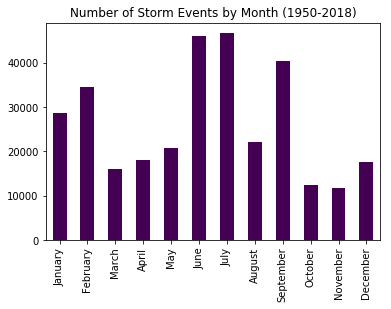

In [7]:
month_vals = details.groupby('MONTH_NAME').EPISODE_ID.nunique()
month_vals.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
ax = month_vals.plot(kind='bar', colormap=plt.cm.viridis); ax.set_title("Number of Storm Events by Month (1950-2018)"); 

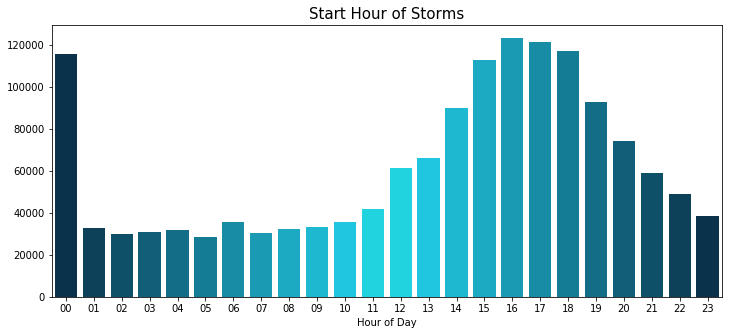

In [22]:
details['Start_Hour'] = details.BEGIN_DATE_TIME.apply(lambda x: x[10:12])
HourVals = details.groupby('Start_Hour').EVENT_ID.count()

color_list = ['#003456','#004567','#005678','#006789','#00789A','#0089AB','#009ABC', '#00ABCD', '#00BCDE', '#00CDEF', '#00DEFF', '#00EFFF']
fig = plt.figure(figsize= (12, 5));ax = plt.axes();
sns.barplot(HourVals.index, HourVals.values, palette=sns.color_palette(color_list + color_list[::-1]))
ax.set_title("Start Hour of Storms", fontsize = 15); ax.set_xlabel("Hour of Day"); 


## Damage - Crops and Property 

In [9]:
def ConvertMoneyValues(value):
    try:
        if (str(value) == 'nan'):
            return None
        elif (str(value)[-1] == 'K') or (str(value)[-1] == 'k'):
            return float(value[:-1])*1000
        elif (str(value)[-1] == 'M'):
            return float(value[:-1])*1000000
        elif (str(value)[-1] == 'B'):
            return float(value[:-1])*1000000000
        elif (str(value)[-1] == 'H') or (str(value)[-1] == 'h'): 
            return float(value[:-1])*100       
        else: 
            return float(value)
    except:
        return None
        
details['DAMAGE_PROPERTY_NUMERIC'] = details.DAMAGE_PROPERTY.apply(lambda x: ConvertMoneyValues(x))  
details['DAMAGE_CROPS_NUMERIC'] = details.DAMAGE_CROPS.apply(lambda x: ConvertMoneyValues(x))  

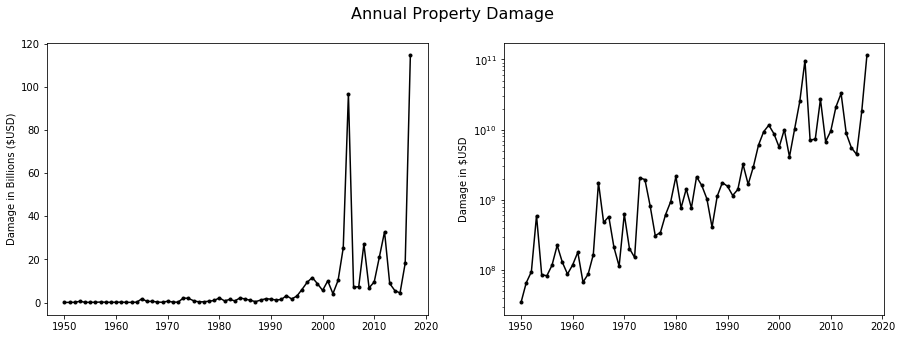

In [10]:
Property_Damage = details.groupby('YEAR').DAMAGE_PROPERTY_NUMERIC.sum().drop(2018)
fig, ax = plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(1,2, 1); plt.plot(Property_Damage/1000000000, 'k.-');ax1.set_ylabel('Damage in Billions ($USD)')
ax2 = plt.subplot(1, 2, 2); plt.plot(Property_Damage, 'k.-'); ax2.set_ylabel('Damage in $USD');ax2.set_yscale('log')
fig.suptitle("Annual Property Damage", fontsize=16);

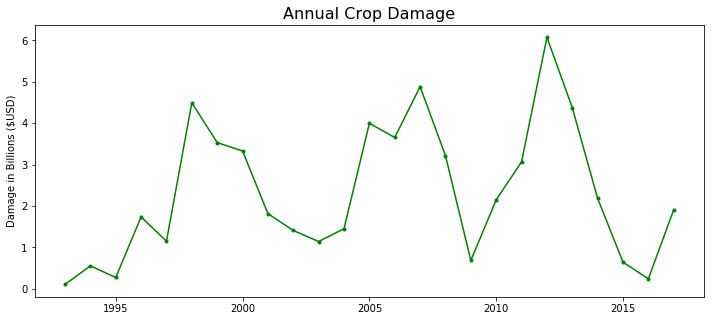

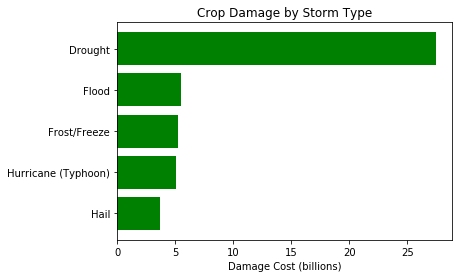

In [11]:
Crop_Damage = details.groupby('YEAR').DAMAGE_CROPS_NUMERIC.sum().drop(2018)
Crop_Damage = Crop_Damage[(Crop_Damage!=0)]
fig = plt.figure(figsize= (12, 5)); ax = plt.axes();
plt.plot(Crop_Damage/1000000000, 'g.-')
ax.set_title("Annual Crop Damage", fontsize=16);ax.set_ylabel("Damage in Billions ($USD)");

Crop_Damage_Event = details.groupby('EVENT_TYPE').DAMAGE_CROPS_NUMERIC.sum().sort_values(ascending=True).tail()
fig = plt.figure(2)
ax=plt.axes(); plt.barh(Crop_Damage_Event.index, Crop_Damage_Event.values/(1*10**9), color="green");
ax.set_title("Crop Damage by Storm Type"); ax.set_xlabel("Damage Cost (billions)");


The most property damage occured in 2005 and 2017, due to Hurricane Katrina and Hurricane Harvey/Irma/Maria (see below). Crop damage has only been recorded since 1993. Crop damage appears to have a periodic trend


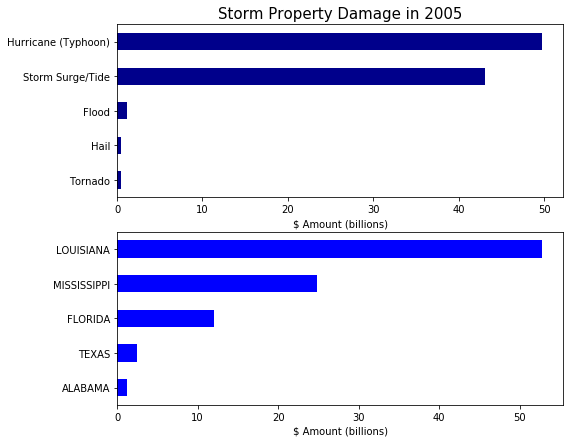

In [12]:
pdamage_2005 = details[details.YEAR == 2005].groupby('EVENT_TYPE').DAMAGE_PROPERTY_NUMERIC.sum().sort_values(ascending=True)
ax, fig = plt.subplots(figsize=(8, 7))
ax1 = plt.subplot(2, 1, 1); (pdamage_2005/1000000000).tail().plot(kind='barh', color='darkblue'); 
ax1.set_title('Storm Property Damage in 2005', fontsize=15); ax1.set_xlabel("$ Amount (billions)");ax1.set_ylabel("");
pdamage_2005_loc = details[details.YEAR == 2005].groupby('STATE').DAMAGE_PROPERTY_NUMERIC.sum().sort_values(ascending=True)
ax2 = plt.subplot(2,1,2); (pdamage_2005_loc/1000000000).tail().plot(kind='barh', color='blue')
ax2.set_xlabel("$ Amount (billions)");ax2.set_ylabel("");

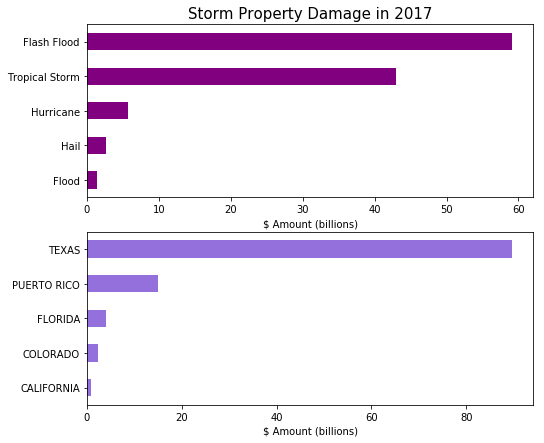

In [24]:
pdamage_2005 = details[details.YEAR == 2017].groupby('EVENT_TYPE').DAMAGE_PROPERTY_NUMERIC.sum().sort_values(ascending=True)
ax, fig = plt.subplots(figsize=(8, 7))
ax1 = plt.subplot(2, 1, 1); (pdamage_2005/1000000000).tail().plot(kind='barh', color='purple'); 
ax1.set_title('Storm Property Damage in 2017', fontsize=15); ax1.set_xlabel("$ Amount (billions)");ax1.set_ylabel("");
pdamage_2005_loc = details[details.YEAR == 2017].groupby('STATE').DAMAGE_PROPERTY_NUMERIC.sum().sort_values(ascending=True)
ax2 = plt.subplot(2,1,2); (pdamage_2005_loc/1000000000).tail().plot(kind='barh', color='mediumpurple')
ax2.set_xlabel("$ Amount (billions)");ax2.set_ylabel("");

## Injuries and Fatalities 

**Note:** A direct fatality or injury is caused directly by the storm event or by airborne/falling/moving debris. An indirect fatality and injury occurs in the vicinity of a 
hydrometeorological event, or after it has ended, but is not directly caused by impact or debris from 
the event. (From http://www.nws.noaa.gov/directives/sym/pd01016005curr.pdf)

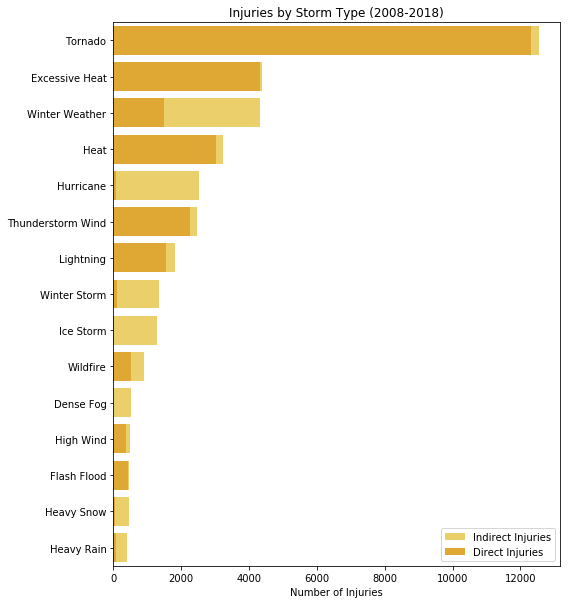

In [14]:

injuries_by_type = last_10_years.groupby('EVENT_TYPE')[['INJURIES_DIRECT', 'INJURIES_INDIRECT']].sum()
injuries_by_type['TOTAL'] = injuries_by_type.sum(axis=1)
injuries_by_type  = injuries_by_type.sort_values(by='TOTAL', ascending = False).head(15)

fig = plt.figure(figsize=(8, 10)); ax = plt.axes()
ax = sns.barplot(y= injuries_by_type.index, x= injuries_by_type.TOTAL, color='#FFDB56', label="Indirect Injuries");
ax = sns.barplot(y= injuries_by_type.index, x= injuries_by_type.values[:, 0], color='#FBB117', label='Direct Injuries');
ax.set_title("Injuries by Storm Type (2008-2018)"); ax.set_xlabel("Number of Injuries"); ax.set_ylabel("");
ax.legend();


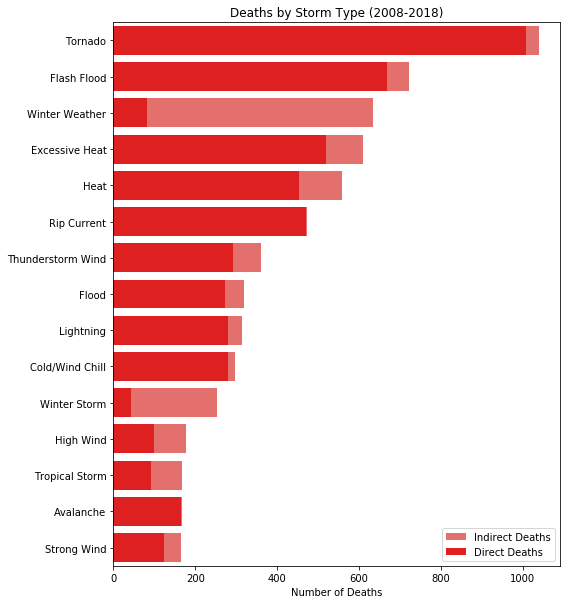

In [15]:
fat_by_type = last_10_years.groupby('EVENT_TYPE')[['DEATHS_DIRECT', 'DEATHS_INDIRECT']].sum()
fat_by_type['TOTAL'] = fat_by_type.sum(axis=1)
fat_by_type = fat_by_type.sort_values('TOTAL', ascending = False).head(15)
fig = plt.figure(figsize=(8, 10)); ax = plt.axes();
sns.barplot(y=fat_by_type.index, x=fat_by_type.TOTAL, color = '#F75D59', label="Indirect Deaths");
sns.barplot(y=fat_by_type.index, x=fat_by_type.values[:,0], color = 'red', label="Direct Deaths");
ax.set_title("Deaths by Storm Type (2008-2018)"); ax.set_ylabel('');ax.set_xlabel("Number of Deaths");ax.legend();

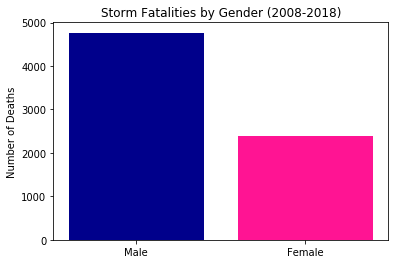

In [16]:
fatalities = pd.read_csv("fatalities.csv")
fatalities = fatalities[~fatalities.FATALITY_DATE.isnull()]
fatalities['Year'] = fatalities.FATALITY_DATE.apply(lambda x: int(str(x)[6:10]))

last_10_years = fatalities[fatalities.Year >= 2008]

ax = plt.axes(); ax.set_title("Storm Fatalities by Gender (2008-2018)");
fat_by_gender = last_10_years.FATALITY_SEX.value_counts()
plt.bar(x= fat_by_gender.index, height = fat_by_gender,color=["darkblue", "deeppink"]);
ax.set_xticklabels(["Male", "Female"]); ax.set_ylabel("Number of Deaths");


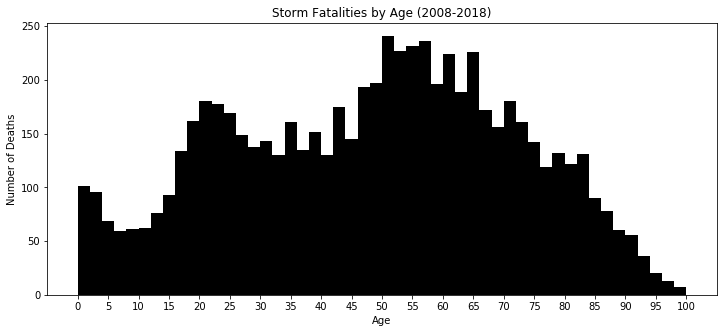

In [17]:
fig = plt.figure(2, figsize=(12, 5)); ax = plt.axes(); ax.set_title("Storm Fatalities by Age (2008-2018)");
plt.hist(last_10_years.FATALITY_AGE.dropna(), bins=50, color='black');
ax.set_xticks(linspace(start=0, stop=100, num=21)); ax.set_ylabel("Number of Deaths");ax.set_xlabel("Age");


In [18]:
last_10_years = last_10_years.join(other = details[['EVENT_ID', 'EVENT_TYPE']].set_index('EVENT_ID'),on = 'EVENT_ID')

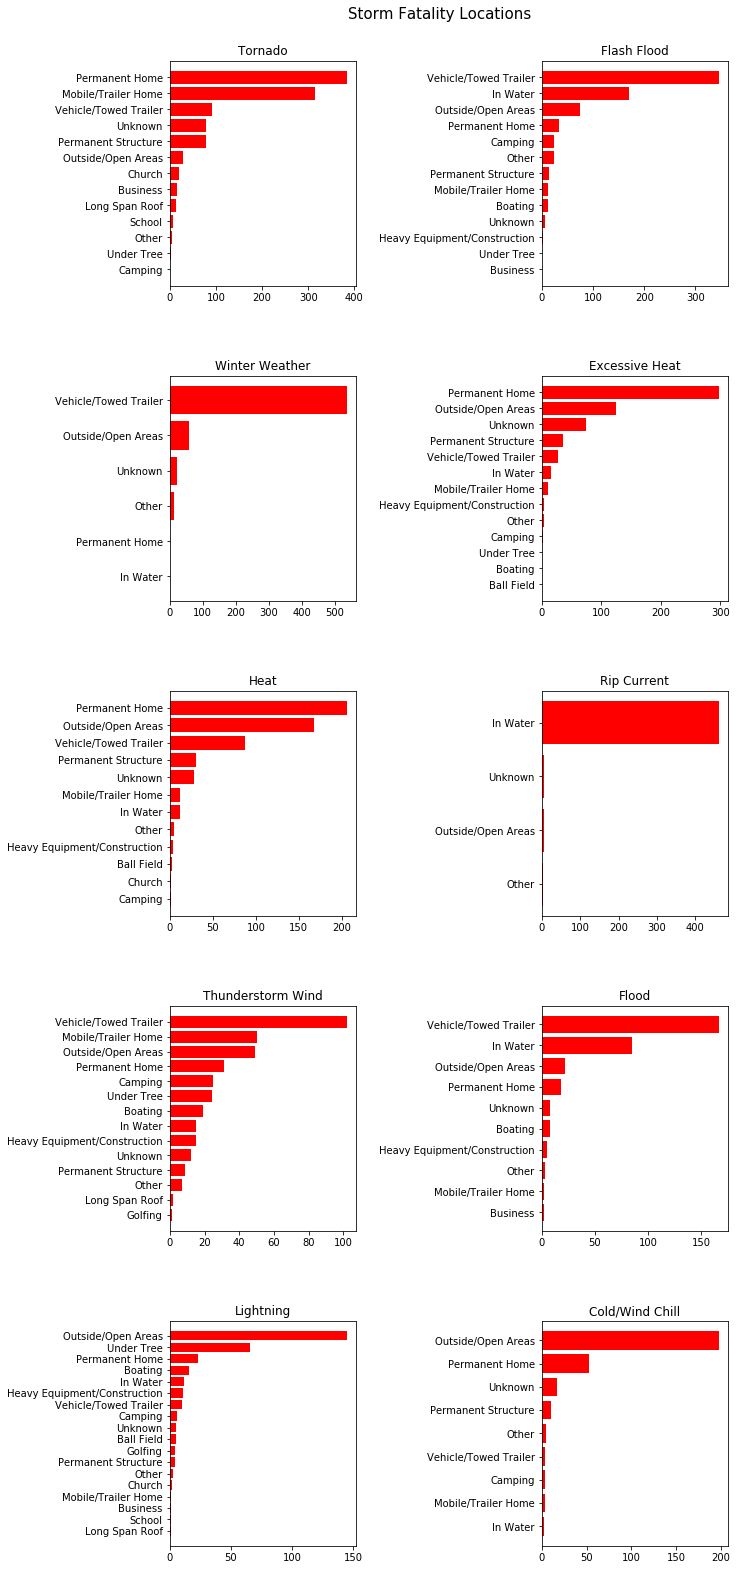

In [19]:
Storm_Types = fat_by_type.index
fig, ax = plt.subplots(figsize = (10, 25));
plt.suptitle("Storm Fatality Locations", fontsize=15);plt.subplots_adjust(wspace=1, hspace=0.4, top=0.95)
for num in range(0, 10):
    loc_counts = last_10_years[last_10_years.EVENT_TYPE == Storm_Types[num]].groupby('FATALITY_LOCATION').FATALITY_ID.count().sort_values(ascending=True)
    ax1 = plt.subplot(5, 2, num+1); plt.barh(loc_counts.index, loc_counts.values, color = 'red')
    ax1.set_title(Storm_Types[num])
# f_tor = last_10_years[last_10_years.EVENT_TYPE == 'Tornado'].groupby('FATALITY_LOCATION').FATALITY_ID.count().sort_values(ascending=True)
# f_flood = last_10_years[last_10_years.EVENT_TYPE == 'Flood'].groupby('FATALITY_LOCATION').FATALITY_ID.count().sort_values(ascending=True)
# 
# ax1 = plt.subplot(3, 2, 1); plt.barh(f_tor.index, f_tor.values);
# ax2 = plt.subplot(3, 2, 2); plt.barh(f_flood.index, f_flood.values)